### Explanation of Ford GoBike System Data

I chose the Bay Wheels bicycle sharing service. This service is provided to support bicycling as an alternative transportation option. There is a lot of information within this dataset that I haven't expected to find. There are in total fourteen columns, and all issues were resolved. All findings will be titled as 'Findings #'. 


Some of the posed questions:
- Why do very few people share their trips? 
- Is the process of sharing trips faulty or not easily accessible?
- Or is it because not a lot of subscribers and customers are aware of it?
- Which of the 2 user types share their trips? 
- Are customers aware that they can share their trips?

All the following imports are needed for running the code.

In [1]:
# all needed libraries imported here 
import pandas as pd
import numpy as np 
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

In [2]:

df_clean = pd.read_csv('master_fordgobike_tripdata.csv')

In [3]:
base_color = sb.color_palette()[0]

### Finding 1: Counting people Who Share Their Trips

In the following plot, we can see that ninety percent of the users don't share their trips. I tried to explore more, but there are no information regarding that matter. I need more information to fully understand the reason behind that, but with the information I currently have, I assume that this particular feature, sharing trips, is either not easily accessible to users or is simply unattractive to them. This is one area that shouldn't be taken lightly because sharing trips is like free advertising, and it will surely result in more people joining.



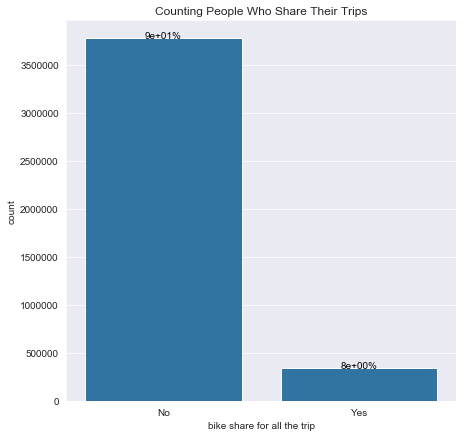

In [11]:
sb.set_style('darkgrid')
plt.figure(figsize=(7,7))
sb.countplot(data = df_clean, x='bike_share_for_all_trip', color = base_color)
plt.xlabel('bike share for all the trip')
plt.title('Counting People Who Share Their Trips')
n_points = df_clean.shape[0]
bike_share_counts = df_clean['bike_share_for_all_trip'].value_counts()

locs, labels = plt.xticks()

for loc,label in zip(locs, labels):
    
    count = bike_share_counts[label.get_text()]
    pct_string = '{:0.1}%'.format(100*count/n_points)
    
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'k')



### Finding 2: User Count

We can see in the following plot that only twenty percent of the users are customers and the rest are subscribers. This is relavent because that might imply that the service is not very handy or attractive; thus, I think that it would be a good idea to shed some light on that area to attract more customers that might become future subscribers if they find the service attractive enough. 




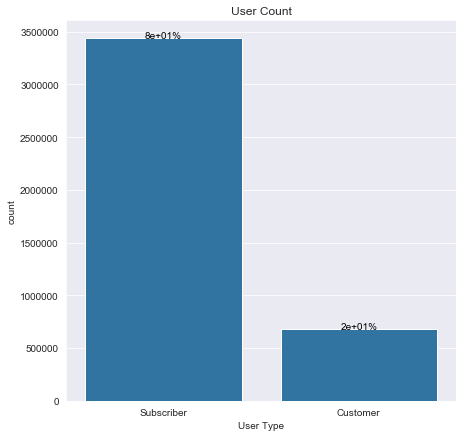

In [12]:
plt.figure(figsize=(7,7))
sb.countplot(data = df_clean, x='user_type', color = base_color )
plt.xlabel('User Type')
plt.title('User Count')
n_points = df_clean.shape[0]
bike_share_counts = df_clean['user_type'].value_counts()
locs, labels = plt.xticks()

for loc,label in zip(locs, labels):
    
    count = bike_share_counts[label.get_text()]
    pct_string = '{:0.1}%'.format(100*count/n_points)
    
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'k')

### Finding 3: Count of Users Who hare Their Trips 

I was able to discover that none of the customers throughout 2018 and 2019 were able to share their trips, and very few subscribers did. This is interesting because this not only supports my previous assumptions, it also helped me formulate a new possible one. It is also possible that customers are not able to because they might not have this functionality. As I previously said, this functionality will surely boost the possibility of having more subscribers in the future. 


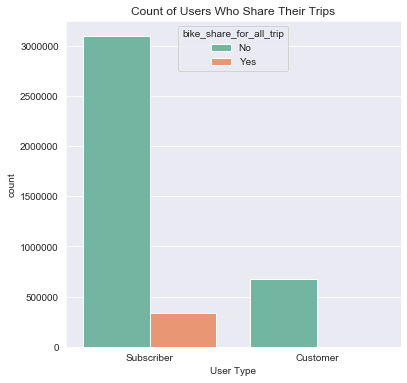

In [13]:
plt.figure(figsize=(6,6))
sb.countplot(data = df_clean, x = 'user_type', hue = 'bike_share_for_all_trip', palette = 'Set2')
plt.title('Count of Users Who Share Their Trips')
plt.xlabel('User Type');

### Finding 4:

The following four plots give us a lot of information about users. The plots display the ten busiest stations in the region. In addition to that, it shows when these stations are busiest throughout the day. This will help us answer the following questions:



- Where are the most stressed stations?
- Which need maintainance more than others?

From these plots, we can know where and how to start our maintainance procedures. In addition, we can know how frequent maintainance procedures are needed.

- At what time do stations usually become  crowded?
- At what time of the day do bikes are needed?
- When is it a good time to update the software or apply any sort of maintainance procedures? 

The first and third plots show at what time subscribers are mostly active. We can see that starting hour and ending hour of the trip are at their top at two locations:

- between 8:00 AM and 10:00 AM  
- between 16:00 AM and 19:00 AM

Throughout The day and in the early morning, very few subscribers do use this service. At these hours, all operations, updates, and maintainance procedures can be applied. We can also see in the second and fourth plots that throughout the day customers are mostly frequent. In fact, they might be the users who mostly use it at office hours.

In addition, this might explain why few subscribers do share their trips. They might be on their way to their jobs and have a lot on their minds, or the might be in a hurry. Lastly, regarding the maintainance procedures, I think it would be ideal if they were implemented in the early morning, but that was difficult, it could be implemented throughout the day when very few subscribers and the customers might need them. 



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

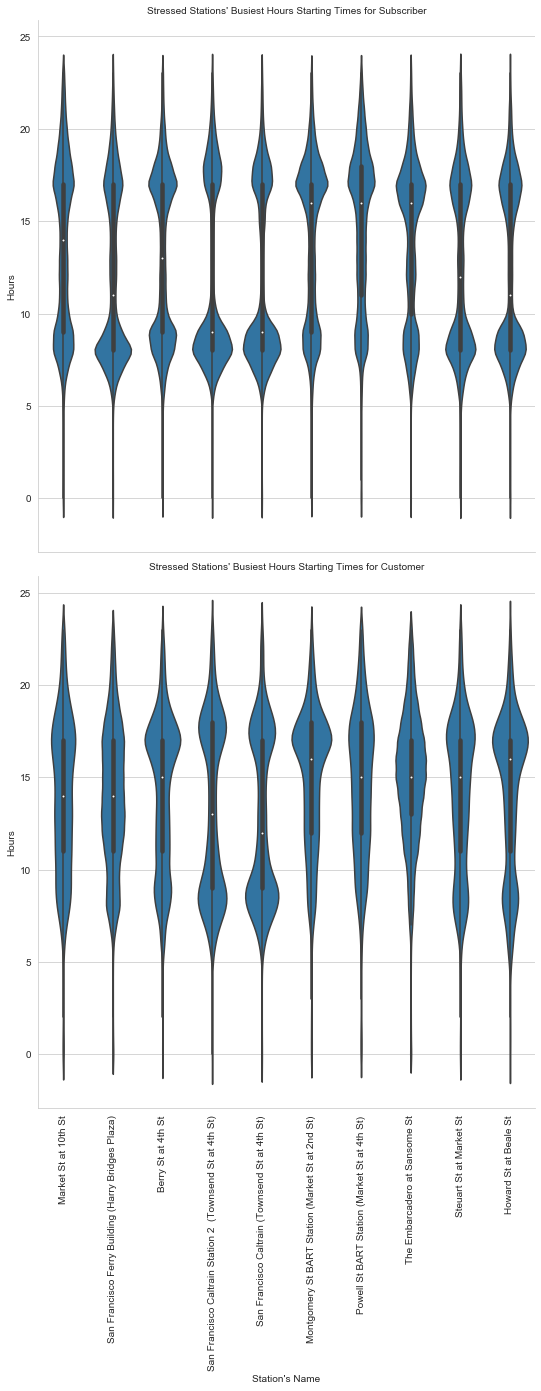

In [14]:
sb.set_style('whitegrid')
ordered_values = ordered_values = df_clean['start_station_name'].value_counts().sort_values(ascending =False)[:10].index
g = sb.FacetGrid(data = df_clean, col = 'user_type', height = 8, col_wrap = 1, margin_titles = True)
g.map(sb.violinplot, 'start_station_name',  'start_hour', order = ordered_values)
g.set_titles('Stressed Stations\' Busiest Hours Starting Times for {col_name}','Large')
g.set_axis_labels('Station\'s Name', 'Hours')
plt.xticks(rotation = 90)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

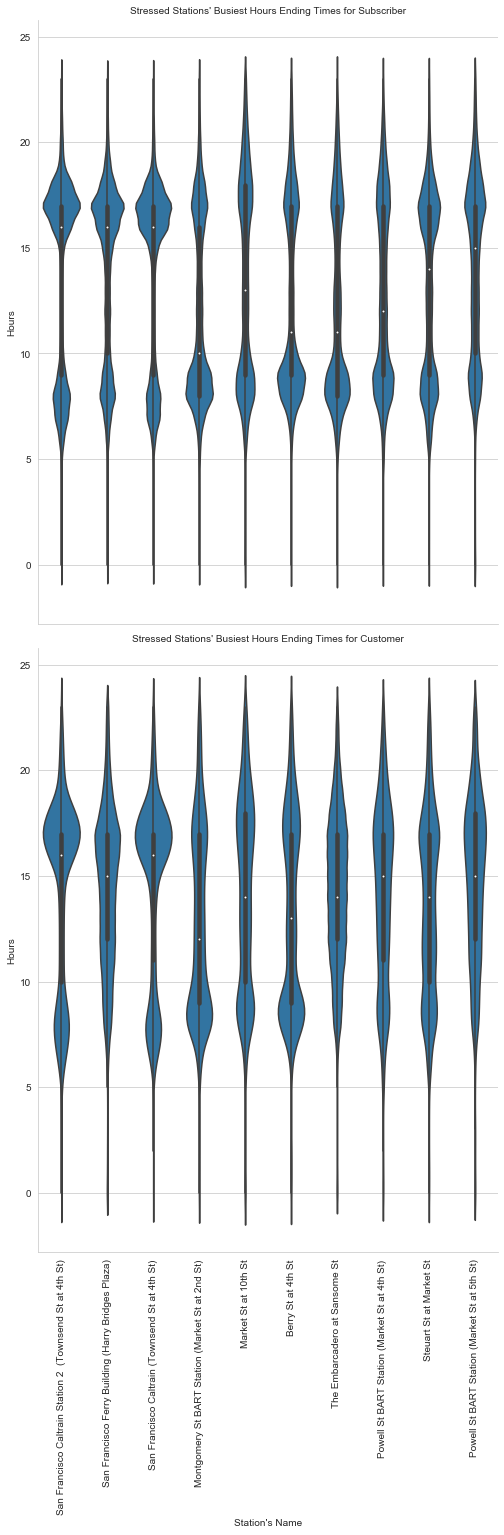

In [15]:
ordered_values = ordered_values = df_clean['end_station_name'].value_counts().sort_values(ascending =False)[:10].index
g = sb.FacetGrid(data = df_clean, col = 'user_type', height = 9, col_wrap = 1, margin_titles = True)
g.map(sb.violinplot, 'end_station_name',  'end_hour', order = ordered_values)
g.set_titles('Stressed Stations\' Busiest Hours Ending Times for {col_name}')
g.set_axis_labels('Station\'s Name', 'Hours')
plt.xticks(rotation = 90)

### Finding 5: 

This last part, I wanted to see if the user count is in general increasing, and as the point plot shows, there are more subscribers than customers. The pattern of their increase, however, is a little bit odd. The subscribers starts nose up then at October, the number of subscribers rapidly decreases. After that, the number increases eventually reaching its peek and decreases rapidly once more but not as much as the first rapid decrease. 

The customers' count on the other hand is less rapid and more gradual increase. It does decrease at the same time subscribers decrease, but not as rapid. This is promising because it shows the number of customers increasing like we hoped it would; however, the rate is slow.

I believe that the increase and decrease in the number of users is due to the weather. People don't want to ride bikes in the cold weather nor do they want to do so in the hot weather. That is why we see this rapid increase and decrease in the subscribers' part, but to make sure of that, a more lengthy study must take place. 

- Is there a way we can see if this service is successful? 
- Is it an appropriate time to add stations or is it too early to tell?

I cannot give a final judgement, but I do believe that the plot does produce promising results. It is too early to tell whether stations should be added. More time and more analysis is needed at this point.

Text(0, 0.5, 'User Count')

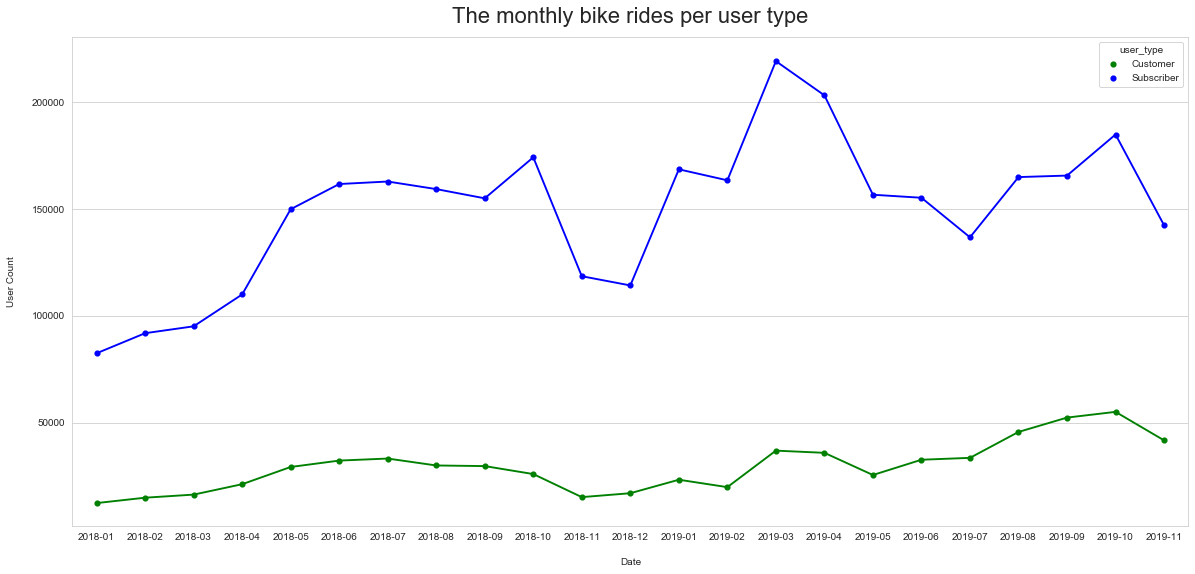

In [16]:
df_date_user = df_clean.groupby(["month_year", "user_type"]).size().reset_index()
plt.figure(figsize=(20,9))
palette = {'Subscriber':'blue', 'Customer':'green'}
sb.pointplot(x='month_year', y=0, hue='user_type', palette=palette, scale=.7, data=df_date_user)
plt.title('The monthly bike rides per user type', fontsize=22, y=1.015)
plt.xlabel('Date', labelpad=16)
plt.ylabel('User Count', labelpad=16)

In [17]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'slide_deck_template.ipynb'])

0